#### Importăm modulele necesare:

In [1]:
import signal_processing, data_load, learn, evaluate, render

Using TensorFlow backend.


#### Valorile parametrilor funcției de extragere a datelor:

In [2]:
num_rows = 45
num_columns = 130
num_channels = 1

num_epochs = 100
num_batch_size = 13
num_speakers = 10
num_seconds = 3.0

#### Extragem datele într-un dataframe:

In [3]:
featuresdf = data_load.make_dataframe_class_no(num_speakers, './Dataset/wav/', num_rows, num_columns, num_seconds)

Finished feature extraction from  1001  files


In [4]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]
model = learn.build_CNN_model(num_rows, num_columns, num_labels)

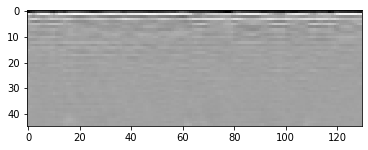

In [5]:
path = 'C:/Users/Maria/Documents/Licenta/Proiect/Dataset/wav/id10001/9mQ11vBs1wc/00004.wav'
render.show_mfccs(path, num_rows, num_columns, num_seconds)

In [6]:
learn.compile(model)

#### Modelul are o acuratețe de aproximativ 5% înainte de antrenament:

In [7]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2]) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 129, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 63, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 30, 64)         8

In [8]:
featuresdf

,feature,class_label,class
0,"[[-202.58553, -199.25586, -199.08582, -209.295...",A.J._Buckley,0
1,"[[-115.306145, -126.16454, -150.82576, -156.61...",A.J._Buckley,0
2,"[[-200.25298, -189.63104, -170.79625, -169.586...",A.J._Buckley,0
3,"[[-364.86426, -365.99326, -312.48773, -243.440...",A.J._Buckley,0
4,"[[-180.10895, -186.5982, -191.97629, -180.9856...",A.J._Buckley,0
...,...,...,...
996,"[[-234.07841, -273.76657, -326.95514, -305.263...",Adam_Brody,9
997,"[[-491.7063, -494.57523, -505.03894, -505.7204...",Adam_Brody,9
998,"[[-416.73138, -420.37796, -425.61163, -456.735...",Adam_Brody,9
999,"[[-311.0644, -320.13596, -334.85696, -329.8414...",Adam_Brody,9


#### Antrenăm modelul timp de 100 de epoci:

In [9]:
history = learn.train_model(model, result_sets, num_epochs, num_batch_size, 'CNNImproved', 'default', 'CNNImproved')

Train on 800 samples, validate on 201 samples
Epoch 1/100
793/800 [============================>.] - ETA: 0s - loss: 7.4782 - accuracy: 0.1639
Epoch 00001: val_loss improved from inf to 2.10720, saving model to saved_models/weights.best.CNNImproved.hdf5
800/800 [==============================] - 5s 6ms/sample - loss: 7.4340 - accuracy: 0.1637 - val_loss: 2.1072 - val_accuracy: 0.3035
Epoch 2/100
780/800 [============================>.] - ETA: 0s - loss: 2.1847 - accuracy: 0.2731
Epoch 00002: val_loss improved from 2.10720 to 1.79974, saving model to saved_models/weights.best.CNNImproved.hdf5
800/800 [==============================] - 4s 5ms/sample - loss: 2.1795 - accuracy: 0.2763 - val_loss: 1.7997 - val_accuracy: 0.4378
Epoch 3/100
793/800 [============================>.] - ETA: 0s - loss: 1.8570 - accuracy: 0.3607
Epoch 00003: val_loss improved from 1.79974 to 1.67310, saving model to saved_models/weights.best.CNNImproved.hdf5
800/800 [==============================] - 4s 5ms/sample

Epoch 26/100
793/800 [============================>.] - ETA: 0s - loss: 0.6583 - accuracy: 0.7705
Epoch 00026: val_loss did not improve from 0.68482
800/800 [==============================] - 4s 5ms/sample - loss: 0.6575 - accuracy: 0.7700 - val_loss: 0.7098 - val_accuracy: 0.7562
Epoch 27/100
793/800 [============================>.] - ETA: 0s - loss: 0.6192 - accuracy: 0.7995
Epoch 00027: val_loss improved from 0.68482 to 0.64479, saving model to saved_models/weights.best.CNNImproved.hdf5
800/800 [==============================] - 4s 5ms/sample - loss: 0.6163 - accuracy: 0.8000 - val_loss: 0.6448 - val_accuracy: 0.8109
Epoch 28/100
793/800 [============================>.] - ETA: 0s - loss: 0.5426 - accuracy: 0.8020
Epoch 00028: val_loss improved from 0.64479 to 0.62743, saving model to saved_models/weights.best.CNNImproved.hdf5
800/800 [==============================] - 4s 5ms/sample - loss: 0.5406 - accuracy: 0.8037 - val_loss: 0.6274 - val_accuracy: 0.8060
Epoch 29/100
793/800 [====

Epoch 53/100
793/800 [============================>.] - ETA: 0s - loss: 0.2267 - accuracy: 0.9193
Epoch 00053: val_loss did not improve from 0.41648
800/800 [==============================] - 4s 5ms/sample - loss: 0.2268 - accuracy: 0.9187 - val_loss: 0.5989 - val_accuracy: 0.8408
Epoch 54/100
793/800 [============================>.] - ETA: 0s - loss: 0.2050 - accuracy: 0.9193
Epoch 00054: val_loss did not improve from 0.41648
800/800 [==============================] - 4s 4ms/sample - loss: 0.2032 - accuracy: 0.9200 - val_loss: 0.4593 - val_accuracy: 0.8607
Epoch 55/100
793/800 [============================>.] - ETA: 0s - loss: 0.2162 - accuracy: 0.9105
Epoch 00055: val_loss did not improve from 0.41648
800/800 [==============================] - 4s 5ms/sample - loss: 0.2148 - accuracy: 0.9112 - val_loss: 0.4573 - val_accuracy: 0.8756
Epoch 56/100
780/800 [============================>.] - ETA: 0s - loss: 0.1907 - accuracy: 0.9295
Epoch 00056: val_loss improved from 0.41648 to 0.41569, 

Epoch 82/100
793/800 [============================>.] - ETA: 0s - loss: 0.1315 - accuracy: 0.9596
Epoch 00082: val_loss did not improve from 0.37513
800/800 [==============================] - 4s 4ms/sample - loss: 0.1305 - accuracy: 0.9600 - val_loss: 0.4639 - val_accuracy: 0.8806
Epoch 83/100
793/800 [============================>.] - ETA: 0s - loss: 0.0896 - accuracy: 0.9672
Epoch 00083: val_loss did not improve from 0.37513
800/800 [==============================] - 4s 5ms/sample - loss: 0.0958 - accuracy: 0.9663 - val_loss: 0.4378 - val_accuracy: 0.8955
Epoch 84/100
793/800 [============================>.] - ETA: 0s - loss: 0.1273 - accuracy: 0.9496
Epoch 00084: val_loss did not improve from 0.37513
800/800 [==============================] - 4s 5ms/sample - loss: 0.1281 - accuracy: 0.9488 - val_loss: 0.4602 - val_accuracy: 0.9154
Epoch 85/100
793/800 [============================>.] - ETA: 0s - loss: 0.1473 - accuracy: 0.9420
Epoch 00085: val_loss did not improve from 0.37513
800/8

In [10]:
evaluate.evaluate_model(model, 'CNNImproved', result_sets)

Training Accuracy:  0.995
Testing Accuracy:  0.90547264


In [11]:
evaluate.display_metrics(model, 'CNNImproved', result_sets)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.94      1.00      0.97        17
           2       1.00      0.98      0.99        47
           3       0.93      0.82      0.87        17
           4       0.87      0.87      0.87        15
           5       0.79      0.90      0.84        29
           6       0.94      1.00      0.97        16
           7       0.94      0.80      0.86        20
           8       0.82      0.82      0.82        11
           9       0.89      0.67      0.76        12

    accuracy                           0.91       201
   macro avg       0.90      0.89      0.89       201
weighted avg       0.91      0.91      0.90       201

Confusion matrix: 
[[17  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0]
 [ 0  1 46  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  2  0  0  1  0]
 [ 0  0  0  0 13  1  0  0  0  1]
 [ 1  0  0  1  0 26  0  1  0  0]
 [ 0  0  0  0  0  0 16  

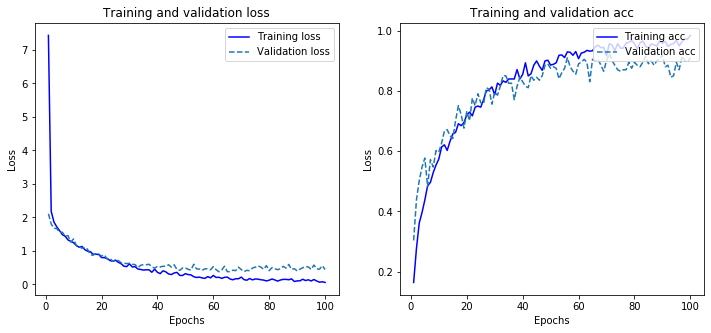

In [12]:
evaluate.plot_history(history)